In [1]:
from __future__ import division, print_function
%matplotlib inline

In [2]:
import skimage


# Images are numpy arrays
## Images are represented in scikit-image using standard numpy arrays. This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as matplotlib and scipy.
Let's see how to build a grayscale image as a 2D array:

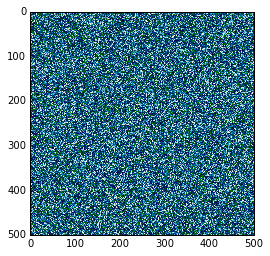

In [3]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='ocean', interpolation='nearest');

<type 'numpy.ndarray'> uint8 (303L, 384L)


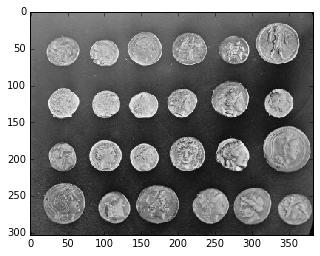

In [4]:

from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest');


A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300L, 451L, 3L)
Values min/max: 0 231


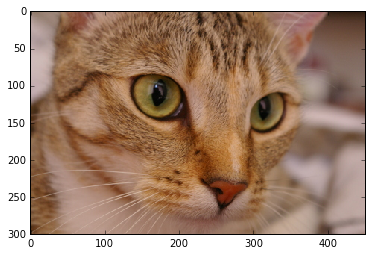

In [5]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest');

These are just numpy arrays. Making a red square is easy using just array slicing and manipulation:

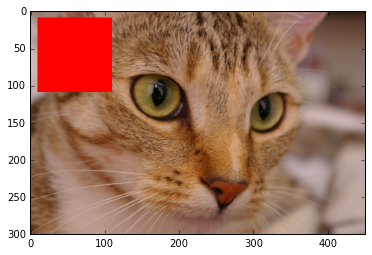

In [6]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);


Images can also include transparent regions by adding a 4th dimension, called an alpha layer.

# Data types and image values¶
## In literature, one finds different conventions for representing image values:
  0 - 255   where  0 is black, 255 is white
  
  0 - 1     where  0 is black, 1 is white
  
scikit-image supports both conventions--the choice is determined by the data-type of the array.
E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


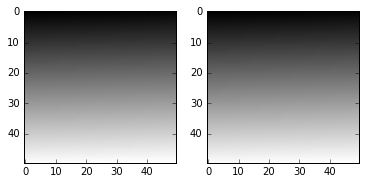

In [7]:

linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input, as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes, 0-65535 for unsigned 16-bit integers).
This is achieved through the use of a few utility functions, such as img_as_float and img_as_ubyte:

In [8]:

from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

type, min, max: float64 0.0 0.905882352941
type, min, max: uint8 0 231
231/255 = 0.905882352941



Your code would then typically look like this:


In [9]:
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]

We recommend using the floating point representation, given that scikit-image mostly uses that format internally.


# Displaying images using matplotlib
Before we get started, a quick note about plotting images---specifically, plotting gray-scale images with Matplotlib. First, let's grab an example image from scikit-image.

In [10]:
#example image from scikit-image.
from skimage import data

image = data.camera()

In [11]:
# Also, we'll want to make sure we have numpy and matplotlib imported.
import matplotlib.pyplot as plt
import numpy as np

If we plot a gray-scale image using the default colormap, "jet", and a gray-scale color map, "gray", you can easily see the difference:


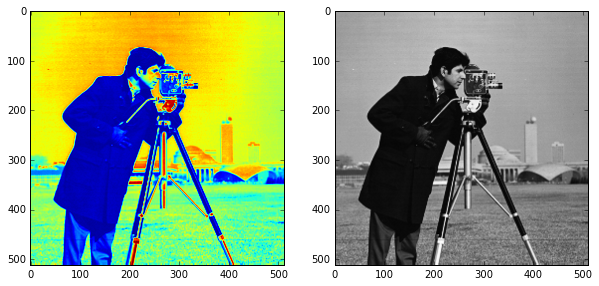

In [12]:
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

We can get a better idea of the ill effects by zooming into the man's face.


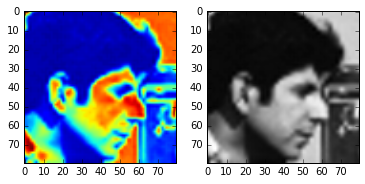

In [13]:
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

Notice how the face looks distorted and splotchy with the "jet" colormap. Also, this colormap distorts the concepts of light and dark, and there are artificial boundaries created by the different color hues. Is that a beauty mark on the man's upper lip? No, it's just an artifact of this ridiculous colormap.

Here's another example:


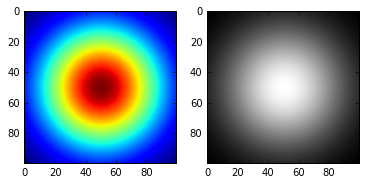

In [14]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1]
R = np.exp(-(X**2 + Y**2) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');

Woah! See all those non-existing contours?
You can set both the method of interpolation and colormap used explicitly in the imshow command:

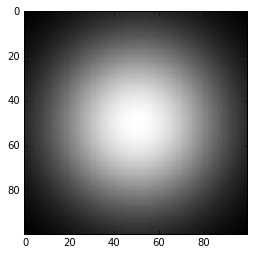

In [15]:
plt.imshow(R, cmap='gray', interpolation='nearest');


Otherwise, you can add the following setting at the top of any script to change the default colormap:


In [16]:
plt.rcParams['image.cmap'] = 'gray'

Don't worry: color images are unaffected by this change.
In addition, we'll set the interpolation to 'nearest neighborhood' so that it's easier to distinguish individual pixels in your image (the default is 'bicubic'--see the exploration below).

In [17]:
plt.rcParams['image.interpolation'] = 'nearest'


For reference, let's look at the images above using Matplotlib's new 'viridis' and 'magma' colormaps (requires matplotlib >= 1.5).


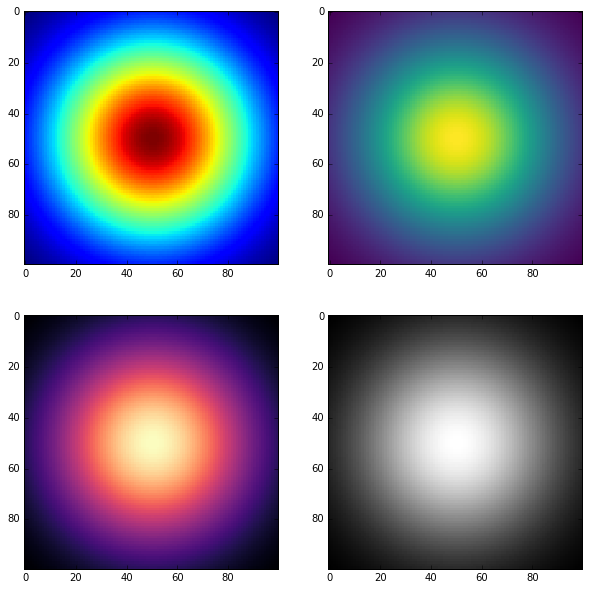

In [18]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(R, cmap='jet')
axes[0, 1].imshow(R, cmap='viridis')
axes[1, 0].imshow(R, cmap='magma')
axes[1, 1].imshow(R, cmap='gray');

# Interactive demo: interpolation and color maps¶


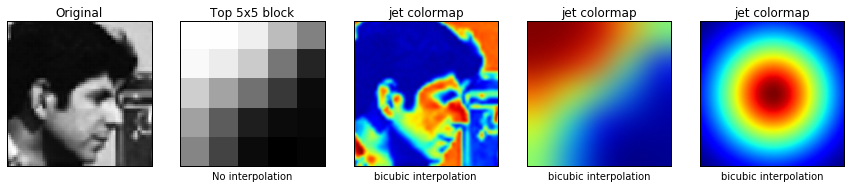

In [19]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(face),
          cmap=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower()),
          reverse_cmap=False,
          interpolation=['nearest', 'bilinear', 'bicubic',
                         'spline16', 'spline36', 'hanning', 'hamming',
                         'hermite', 'kaiser', 'quadric', 'catrom',
                         'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
def imshow_params(image, cmap='jet', reverse_cmap=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    
    if reverse_cmap:
        cmap = cmap + '_r'
    
    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')
    
    axes[1].imshow(image[:5, :5], cmap='gray', interpolation='nearest')
    axes[1].set_title('Top 5x5 block')
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)
    
    axes[3].imshow(image[:5, :5], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('%s colormap' % cmap)
    axes[3].set_xlabel('%s interpolation' % interpolation)
    
    axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    axes[4].set_title('%s colormap' % cmap)
    axes[4].set_xlabel('%s interpolation' % interpolation)
    
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])


# Image I/O
Mostly, we won't be using input images from the scikit-image example data sets. Those images are typically stored in JPEG or PNG format. Since scikit-image operates on NumPy arrays, any image reader library that provides arrays will do. Options include matplotlib, pillow, imageio, imread, etc.
scikit-image conveniently wraps many of these in the io submodule, and will use whatever option is available:

<type 'numpy.ndarray'>


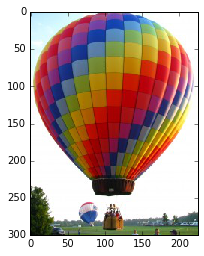

In [20]:

from skimage import io

image = io.imread('./balloon.jpg')

print(type(image))
plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images:


In [21]:

ic = io.imread_collection('./*.jpg')

print(type(ic), '\n\n', ic)

<class 'skimage.io.collection.ImageCollection'> 

 ['.\\balloon.jpg', '.\\chromosomes.jpg']


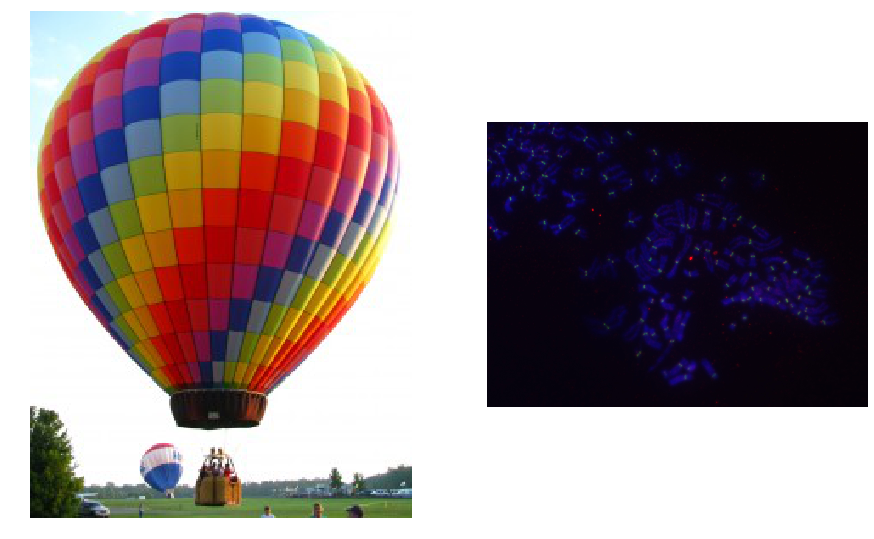

In [22]:
f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize=(15, 10))

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

<type 'numpy.ndarray'>


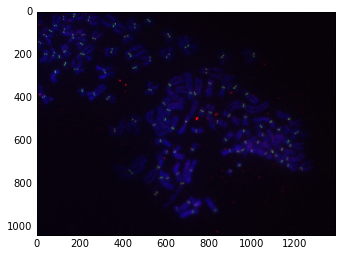

In [28]:
color_image = io.imread('./balloon.jpg')

print(type(image))
plt.imshow(image);

Split this image up into its three components, red, green and blue, and display each separately.
HINT: To display multiple images, we provide you with a small utility library called skdemo:

In [24]:
red_image = color_image[...,0] #color_image[:,:,0]
green_image = color_image[...,1]
blue_image = color_image[...,2]

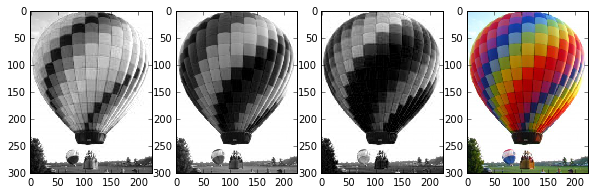

In [27]:
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
axes[0].imshow(red_image)
axes[1].imshow(green_image)
axes[2].imshow(blue_image)
axes[3].imshow(color_image)